# Data Exploration
In this notebook, I'm doing some basic exploration of the csv and image data, mainly to understand how it's formatted.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

The training data has 13 columns. 11 of them are the binary target variables. We also have the 'StudyInstanceUID' which identifies the corresponding image. And lastly the PatientID indicates which rows came from the same patient, and so could be correlated.

In [2]:
filename = 'data/train.csv'
df = pd.read_csv(filename)
df.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


Fortunately, the tabular data is very clean. There are no missing values for images, ids or binary labels.

In [29]:
df.isna().sum()

StudyInstanceUID              0
ETT - Abnormal                0
ETT - Borderline              0
ETT - Normal                  0
NGT - Abnormal                0
NGT - Borderline              0
NGT - Incompletely Imaged     0
NGT - Normal                  0
CVC - Abnormal                0
CVC - Borderline              0
CVC - Normal                  0
Swan Ganz Catheter Present    0
PatientID                     0
dtype: int64

In [3]:
df.describe()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
count,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000
mean,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.027590
std,0.051179,0.190785,0.427496,0.095857,0.131438,0.288107,0.366110,0.308106,0.449603,0.454305,0.163799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Most PatientIDs appear more than once in the training data, up to 172 times. There are 

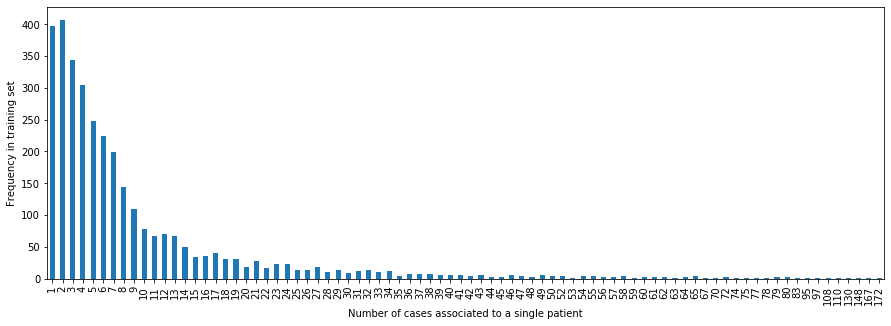

In [58]:
ax = df.PatientID.value_counts().value_counts().sort_index().plot(kind='bar',figsize=(15,5))
ax.set_xlabel('Number of cases associated to a single patient');
ax.set_ylabel('Frequency in training set');

In [56]:
df.PatientID.value_counts().describe()

count    3255.000000
mean        9.242089
std        12.624028
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       172.000000
Name: PatientID, dtype: float64

In [13]:
non_numerical_columns = ['StudyInstanceUID','PatientID']
y = df.drop(non_numerical_columns,axis=1).values
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [19]:
y_pred = np.tile(np.mean(y_train,axis=0),(y_test.shape[0],1))

In [20]:
y_pred.shape

(6017, 11)

In [23]:
roc_auc_score(y_test,y_pred,average='macro')

0.5